In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model


Using TensorFlow backend.


In [3]:
threshold = 0.75
font = cv2.FONT_HERSHEY_SIMPLEX
model = load_model('cifar_model.h5')


In [4]:
def preprocessing(img):
    img = img/255
    return img

In [5]:
code = {'plane':0, 'car':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

def getClassName(classNo) :
    for i,j in code.items() :
        if j == classNo :
            return i

16

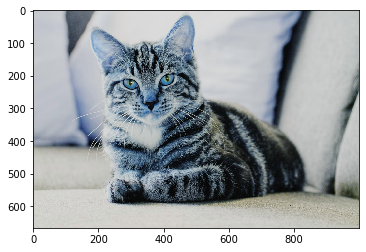

In [34]:
#preprocess the image
imgOrignal = cv2.imread('img6.jpg') 
plt.imshow(imgOrignal)
#img =cv2.imshow('original one',imgOrignal)
img = np.asarray(imgOrignal)
img = cv2.resize(img, (32,32),interpolation=cv2.INTER_CUBIC)
img = preprocessing(img)
#cv2.imshow("Processed Image", img)
img = img.reshape(1, 32, 32, 3)
cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.LINE_AA

In [35]:
predictions = model.predict(img)
classIndex = model.predict_classes(img)
probabilityValue =np.amax(predictions)
print(getClassName(classIndex))
cv2.putText(imgOrignal,str(classIndex)+" "+str(getClassName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.imshow("Result", imgOrignal)
print("the image is a",str(getClassName(classIndex)))
cv2.waitKey(0)


cat
the image is a cat


-1